In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('mic2.xlsx',
                   engine = 'openpyxl')
#df

In [ ]:
def custom_cls(x):
    if (0<= x <= 20):
        return('<=20')
    elif (21 <= x <= 30):
        return '21-30'
    elif(31 <= x <= 40):
        return '31 - 40'
    else:
        return '> 40'

In [ ]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis = 1)
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21-30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,> 40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21-30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21-30


In [ ]:
df.columns

Index(['Age', 'Sex', 'Ocupation', 'Monthly income ', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'reason', 'Popular', 'My favorite',
       'Kind', 'Preference', 'Recommend', 'AgeGP'],
      dtype='object')

In [ ]:
age_gender = df.groupby(['AgeGP','Sex']).size()
age_gender = age_gender.to_frame()
age_gender

0
AgeGP   Sex       
21-30   Female  11
        Male    20
31 - 40 Female   4
        Male     1
<=20    Female   5
        Male     6
> 40    Female   2
        Male     1

In [ ]:
type(age_gender)

pandas.core.frame.DataFrame

In [ ]:
age_sex = pd.pivot_table(index = ['AgeGP','Sex'],
                         aggfunc = len,
                         values = 'Availability',
                         data = df,
                         margins = True
                    )

age_sex

Availability
AgeGP   Sex                 
21-30   Female            11
        Male              20
31 - 40 Female             4
        Male               1
<=20    Female             5
        Male               6
> 40    Female             2
        Male               1
All                       50

In [ ]:
age_gender = age_gender.rename(columns = {0: 'Count'})
age_gender = age_gender.reset_index()
age_gender

,AgeGP,Sex,Count,%
0,21-30,Female,11,22.0
1,21-30,Male,20,40.0
2,31 - 40,Female,4,8.0
3,31 - 40,Male,1,2.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,> 40,Female,2,4.0
7,> 40,Male,1,2.0


In [ ]:
x = age_gender.iloc[:, -1].sum()
x
age_gender['%'] = (age_gender.iloc[:, -1]/x)* 100
age_gender

,AgeGP,Sex,Count,%
0,21-30,Female,11,22.0
1,21-30,Male,20,40.0
2,31 - 40,Female,4,8.0
3,31 - 40,Male,1,2.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,> 40,Female,2,4.0
7,> 40,Male,1,2.0


In [ ]:
df.columns

Index(['Age', 'Sex', 'Ocupation', 'Monthly income ', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'reason', 'Popular', 'My favorite',
       'Kind', 'Preference', 'Recommend', 'AgeGP'],
      dtype='object')

In [ ]:
plot_order = ['<=20', '21-30', '31 - 40', '> 40']

In [ ]:
import seaborn as sns

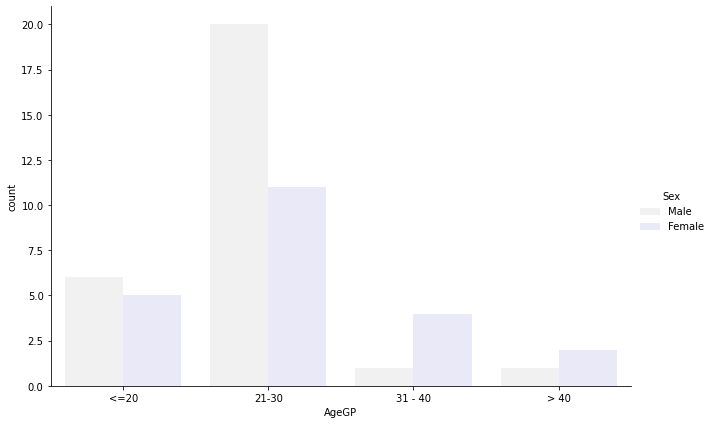

In [ ]:
g = sns.catplot(x = 'AgeGP',
                kind = 'count',
                data = df,
                hue= 'Sex',
                order = plot_order,
                height = 6,
                aspect = 1.5,
                #mpl_style = 'seaborn pastel'
                color = 'lavender'
)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
fig = px.sunburst(age_gender,
                  values = 'Count',
                  path = ['%','Count','AgeGP','Sex'],
                  color = 'AgeGP',
                  title = 'Number of respondents by AgeGroup and Gender'
                  )
plt.savefig('sample_data/age_groupSun.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
#pip install dash

In [ ]:
fig2 = px.sunburst(age_gender,
                  values = 'Count',
                  path = ['AgeGP','Sex'],
                  color = 'AgeGP',
                  title = 'Number of respondents by AgeGroup and Gender'
                  )
#plt.savefig('sample_data/age_groupSun.png')
fig2.show()

In [ ]:
#pip install jupyter_dash

In [ ]:
import dash
from dash import html

In [ ]:
from dash import dcc

In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
p2 = JupyterDash(__name__)
p2.layout = html.Div(children=[html.H1('Title',
                                       ),
                               dcc.Graph(figure = fig),
                               dcc.Graph(figure = fig2),
                               ]
                     )
if __name__ =='__main__':
  p2.run_server()

Dash app running on:


<IPython.core.display.Javascript object>